In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from collections import Counter

In [ ]:
df=pd.read_csv('thesis dataset copy - Sheet1 (2).csv')
df.head()

,Date,Chemical Name,Price/Kg,Packing,Purity,Chemical Nature,Supplier Country,Storing Container,Supplier Company,Boiling Point,Composition,Usage,Price/MT,Quality
0,3/1/2024,Titanium Dioxide,432,25,72,Powder,Korea,Paper Bag,Cosmo Chemicals Co. Ltd.,2500.0,"Titanum, Oxygen",printing and paste liquify,2870,Good
1,3/2/2024,Titanium Dioxide,432,25,72,Powder,Korea,Paper Bag,Cosmo Chemicals Co. Ltd.,2500.0,"Titanum, Oxygen",printing and paste liquify,2870,Good
2,3/3/2024,Titanium Dioxide,432,25,72,Powder,Korea,Paper Bag,Cosmo Chemicals Co. Ltd.,2500.0,"Titanum, Oxygen",printing and paste liquify,2870,Good
3,3/4/2024,Titanium Dioxide,432,25,72,Powder,Korea,Paper Bag,Cosmo Chemicals Co. Ltd.,2500.0,"Titanum, Oxygen",printing and paste liquify,2870,Good
4,3/5/2024,Titanium Dioxide,432,25,72,Powder,Korea,Paper Bag,Cosmo Chemicals Co. Ltd.,2500.0,"Titanum, Oxygen",printing and paste liquify,2870,Good


In [ ]:
df=df.drop(columns=["Date"])
df.head()

,Chemical Name,Price/Kg,Packing,Purity,Chemical Nature,Supplier Country,Storing Container,Supplier Company,Boiling Point,Composition,Usage,Price/MT,Quality
0,Titanium Dioxide,432,25,72,Powder,Korea,Paper Bag,Cosmo Chemicals Co. Ltd.,2500.0,"Titanum, Oxygen",printing and paste liquify,2870,Good
1,Titanium Dioxide,432,25,72,Powder,Korea,Paper Bag,Cosmo Chemicals Co. Ltd.,2500.0,"Titanum, Oxygen",printing and paste liquify,2870,Good
2,Titanium Dioxide,432,25,72,Powder,Korea,Paper Bag,Cosmo Chemicals Co. Ltd.,2500.0,"Titanum, Oxygen",printing and paste liquify,2870,Good
3,Titanium Dioxide,432,25,72,Powder,Korea,Paper Bag,Cosmo Chemicals Co. Ltd.,2500.0,"Titanum, Oxygen",printing and paste liquify,2870,Good
4,Titanium Dioxide,432,25,72,Powder,Korea,Paper Bag,Cosmo Chemicals Co. Ltd.,2500.0,"Titanum, Oxygen",printing and paste liquify,2870,Good


In [ ]:
columns_to_one_hot_encode=[
    'Chemical Name', 'Chemical Nature','Supplier Country','Storing Container','Supplier Company','Composition','Usage'
]

In [ ]:
one_hot_encoder = OneHotEncoder(drop='first', sparse=False)
encoded_columns = one_hot_encoder.fit_transform(df[columns_to_one_hot_encode])
encoded_df = pd.DataFrame(encoded_columns, columns=one_hot_encoder.get_feature_names_out(columns_to_one_hot_encode))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
df = df.drop(columns=columns_to_one_hot_encode)
df=pd.concat([df,encoded_df],axis=1)

In [ ]:
label_encoder = LabelEncoder()
df['Quality'] = label_encoder.fit_transform(df['Quality'])

In [ ]:
df=pd.DataFrame(df)

In [ ]:
df.fillna(df.mean(), inplace=True)
X = df.drop(columns=['Quality'])
y = df['Quality']
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [ ]:
X

array([[0.7875    , 0.3       , 0.63934426, ..., 0.        , 0.        ,
        0.        ],
       [0.7875    , 0.3       , 0.63934426, ..., 0.        , 0.        ,
        0.        ],
       [0.7875    , 0.3       , 0.63934426, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.6875    , 0.3       , 0.16393443, ..., 1.        , 0.        ,
        0.        ],
       [0.6875    , 0.3       , 0.16393443, ..., 1.        , 0.        ,
        0.        ],
       [0.6875    , 0.3       , 0.16393443, ..., 1.        , 0.        ,
        0.        ]])

In [ ]:
# import numpy as np
# from collections import Counter

class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, *, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

    def is_leaf_node(self):
        return self.value is not None

class DecisionTree:
    def __init__(self, min_samples_split=2, max_depth=100, n_features=5):
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.n_features = n_features
        self.root = None

    def fit(self, X, y):
        self.n_features = X.shape[1] if not self.n_features else min(X.shape[1], self.n_features)
        self.root = self._grow_tree(X, y)

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_feats = X.shape
        n_labels = len(np.unique(y))

        if (depth >= self.max_depth or n_labels == 1 or n_samples < self.min_samples_split):
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        #feat_idxs = np.random.choice(n_feats, self.n_features, replace=False) original
        best_feature, best_thresh = self._best_split(X, y, range(n_feats))
        #best_feature, best_thresh = self._best_split(X, y, feat_idxs) original

        left_idxs, right_idxs = self._split(X[:, best_feature], best_thresh)
        if len(left_idxs) == 0 or len(right_idxs) == 0:
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth + 1)
        right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth + 1)
        return Node(best_feature, best_thresh, left, right)

    # def _best_split(self, X, y, feat_idxs):
    #     best_gain = -1
    #     split_idx, split_threshold = None, None

    #     for feat_idx in feat_idxs:
    #         X_column = X[:, feat_idx]
    #         thresholds = np.unique(X_column)

    #         for thr in thresholds:
    #             gain = self._information_gain(y, X_column, thr)

    #             if gain > best_gain:
    #                 best_gain = gain
    #                 split_idx = feat_idx
    #                 split_threshold = thr

        #return split_idx, split_threshold
    # def _best_split(self, X, y, feat_idxs, n_bins=10):
    #     best_gain = -1
    #     split_idx, split_threshold = None, None

    #     for feat_idx in feat_idxs:
    #      X_column = X[:, feat_idx]
    #      hist, bin_edges = np.histogram(X_column, bins=n_bins)

    #     for bin_idx in range(1, len(bin_edges) - 1):
    #         thr = bin_edges[bin_idx]
    #         gain = self._information_gain(y, X_column, thr)

    #         if gain > best_gain:
    #             best_gain = gain
    #             split_idx = feat_idx
    #             split_threshold = thr

    #     return split_idx, split_threshold
    #### this is a modification . keep it for explanation####
    def _best_split(self, X, y, feat_idxs, n_quantiles=10):
        best_gain = -1
        split_idx, split_threshold = None, None

        for feat_idx in feat_idxs:
         X_column = X[:, feat_idx]
         quantiles = np.linspace(0, 100, n_quantiles + 2)[1:-1]
         thresholds = np.percentile(X_column, quantiles)

         for thr in thresholds:
            gain = self._information_gain(y, X_column, thr)

            if gain > best_gain:
                best_gain = gain
                split_idx = feat_idx
                split_threshold = thr

        return split_idx, split_threshold
###########################################




    # def _best_split(self, X, y, feat_idxs):
    #      best_gain = -1
    #      split_idx, split_threshold = None, None

    #      # Calculate feature importance scores (e.g., using Gini importance)
    #      feature_importance_scores = calculate_feature_importance(X, y)

    # # Calculate weights based on feature importance scores
    #      feature_weights = feature_importance_scores / np.sum(feature_importance_scores)

    # # Sample features with replacement using weighted probabilities
    #      sampled_feat_idxs = np.random.choice(feat_idxs, size=self.n_features, replace=True, p=feature_weights)

    #      for feat_idx in sampled_feat_idxs:
    #       X_column = X[:, feat_idx]
    #       thresholds = np.unique(X_column)

    #      for thr in thresholds:
    #         gain = self._information_gain(y, X_column, thr)

    #         if gain > best_gain:
    #             best_gain = gain
    #             split_idx = feat_idx
    #             split_threshold = thr

    #      return split_idx, split_threshold

    ################################
    # def _gini_impurity(self, y):
    #     hist = np.bincount(y)
    #     probabilities = hist / len(y)
    #     impurity = 1 - np.sum(probabilities ** 2)
    #     return impurity
    # def _information_gain(self, y, X_column, threshold):
    #     parent_impurity = self._gini_impurity(y)
    #     left_idxs, right_idxs = self._split(X_column, threshold)

    #     if len(left_idxs) == 0 or len(right_idxs) == 0:
    #         return 0

    #     n = len(y)
    #     n_l, n_r = len(left_idxs), len(right_idxs)
    #     impurity_l, impurity_r = self._gini_impurity(y[left_idxs]), self._gini_impurity(y[right_idxs])
    #     child_impurity = (n_l / n) * impurity_l + (n_r / n) * impurity_r

    #     information_gain = parent_impurity - child_impurity
    #     return information_gain


    ################################ original
    def _information_gain(self, y, X_column, threshold):
        parent_entropy = self._entropy(y)

        left_idxs, right_idxs = self._split(X_column, threshold)

        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0

        n = len(y)
        n_l, n_r = len(left_idxs), len(right_idxs)
        e_l, e_r = self._entropy(y[left_idxs]), self._entropy(y[right_idxs])
        child_entropy = (n_l / n) * e_l + (n_r / n) * e_r

        information_gain = parent_entropy - child_entropy
        return information_gain
################################################# original


    def _split(self, X_column, split_thresh):
        left_idxs = np.argwhere(X_column <= split_thresh).flatten()
        right_idxs = np.argwhere(X_column > split_thresh).flatten()
        return left_idxs, right_idxs


    def _entropy(self, y):
        hist = np.bincount(y)
        ps = hist / len(y)
        return -np.sum([p * np.log(p) for p in ps if p > 0])

    def _most_common_label(self, y):
        if len(y) == 0:
            return None
        counter = Counter(y)
        value = counter.most_common(1)[0][0]
        return value

    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value

        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)

class RandomForest:
    def __init__(self, n_trees=10, max_depth=20, min_samples_split=2, n_features=5):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.n_features = n_features
        self.trees = []


    def fit(self, X, y):
        self.trees = []
        for _ in range(self.n_trees):
            tree = DecisionTree(max_depth=self.max_depth, min_samples_split=self.min_samples_split, n_features=self.n_features)
            X_sample, y_sample = self._bootstrap_samples(X, y)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

    # def _bootstrap_samples(self, X, y):
    #     n_samples = X.shape[0]
    #     idxs = np.random.choice(n_samples, n_samples, replace=True)
    #     return X[idxs], y[idxs]
    ############################



    def _bootstrap_samples(self, X, y, n_splits=5):
      n_samples = X.shape[0]

    # Use StratifiedShuffleSplit to create stratified splits
      sss = StratifiedShuffleSplit(n_splits=n_splits, test_size=0.8, random_state=42)

    # Get the indices for the splits
      for train_index, _ in sss.split(X, y):
         sample_indices = train_index

    # Sample the data using the obtained indices
      return X[sample_indices], y[sample_indices]










#################################

    def predict(self, X):
        tree_preds = np.array([tree.predict(X) for tree in self.trees])
        tree_preds = np.swapaxes(tree_preds, 0, 1)
        y_pred = [self._most_common_label(tree_pred) for tree_pred in tree_preds]
        return np.array(y_pred)

    def _most_common_label(self, y):
        if len(y) == 0:
            return None
        counter = Counter(y)
        value = counter.most_common(1)[0][0]
        return value

def accuracy(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)


# # Apply PCA
# pca = PCA(n_components=2)
# x_train_pca = pca.fit_transform(x_train)
# x_test_pca = pca.transform(x_test)

# # Split the data into training and testing sets
# x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Convert data to correct type
x_train = np.array(x_train, dtype=float)
x_test = np.array(x_test, dtype=float)
y_train = np.array(y_train, dtype=int)
y_test = np.array(y_test, dtype=int)

# Train and test the Random Forest classifier
clf = RandomForest()
clf.fit(x_train, y_train)
predictions = clf.predict(x_test)

#print("Random Forest classification accuracy: ", accuracy(y_test, predictions))
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      0.89      0.92       656
           1       0.94      0.98      0.96      1206

    accuracy                           0.95      1862
   macro avg       0.95      0.94      0.94      1862
weighted avg       0.95      0.95      0.95      1862



adding error

Random Forest classification accuracy:  0.9484425349087003
Random Forest RMSE:  0.22706268978257893
Random Forest MAE:  0.05155746509129968
Random Forest R-squared:  0.7740565465356146
              precision    recall  f1-score   support

           0       0.96      0.89      0.92       656
           1       0.94      0.98      0.96      1206

    accuracy                           0.95      1862
   macro avg       0.95      0.94      0.94      1862
weighted avg       0.95      0.95      0.95      1862



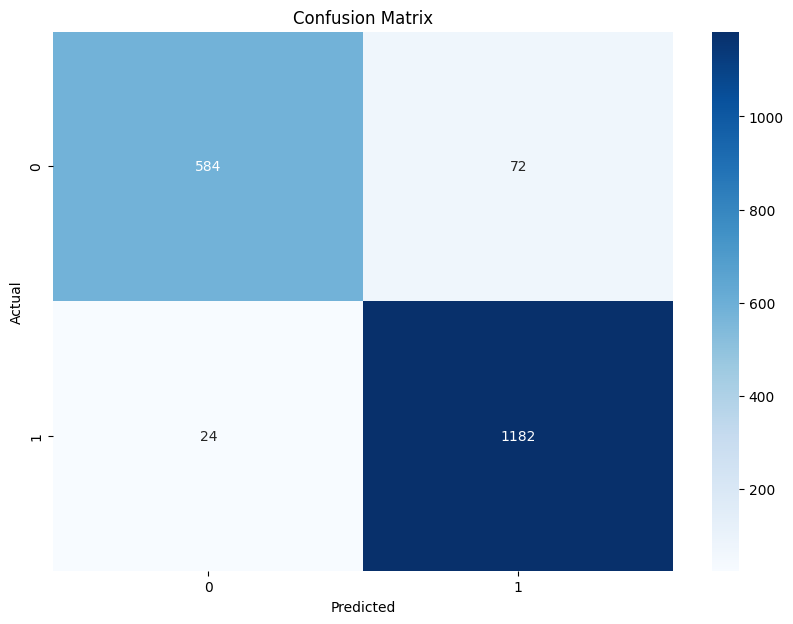

In [ ]:
import numpy as np
from collections import Counter
from sklearn.metrics import classification_report, mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import StratifiedShuffleSplit

class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, *, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

    def is_leaf_node(self):
        return self.value is not None

class DecisionTree:
    def __init__(self, min_samples_split=2, max_depth=100, n_features=5):
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.n_features = n_features
        self.root = None

    def fit(self, X, y):
        self.n_features = X.shape[1] if not self.n_features else min(X.shape[1], self.n_features)
        self.root = self._grow_tree(X, y)

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_feats = X.shape
        n_labels = len(np.unique(y))

        if (depth >= self.max_depth or n_labels == 1 or n_samples < self.min_samples_split):
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        best_feature, best_thresh = self._best_split(X, y, range(n_feats))

        left_idxs, right_idxs = self._split(X[:, best_feature], best_thresh)
        if len(left_idxs) == 0 or len(right_idxs) == 0:
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth + 1)
        right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth + 1)
        return Node(best_feature, best_thresh, left, right)

    def _best_split(self, X, y, feat_idxs, n_quantiles=10):
        best_gain = -1
        split_idx, split_threshold = None, None

        for feat_idx in feat_idxs:
            X_column = X[:, feat_idx]
            quantiles = np.linspace(0, 100, n_quantiles + 2)[1:-1]
            thresholds = np.percentile(X_column, quantiles)

            for thr in thresholds:
                gain = self._information_gain(y, X_column, thr)

                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_threshold = thr

        return split_idx, split_threshold

    def _information_gain(self, y, X_column, threshold):
        parent_entropy = self._entropy(y)

        left_idxs, right_idxs = self._split(X_column, threshold)

        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0

        n = len(y)
        n_l, n_r = len(left_idxs), len(right_idxs)
        e_l, e_r = self._entropy(y[left_idxs]), self._entropy(y[right_idxs])
        child_entropy = (n_l / n) * e_l + (n_r / n) * e_r

        information_gain = parent_entropy - child_entropy
        return information_gain

    def _split(self, X_column, split_thresh):
        left_idxs = np.argwhere(X_column <= split_thresh).flatten()
        right_idxs = np.argwhere(X_column > split_thresh).flatten()
        return left_idxs, right_idxs

    def _entropy(self, y):
        hist = np.bincount(y)
        ps = hist / len(y)
        return -np.sum([p * np.log(p) for p in ps if p > 0])

    def _most_common_label(self, y):
        if len(y) == 0:
            return None
        counter = Counter(y)
        value = counter.most_common(1)[0][0]
        return value

    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value

        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)

class RandomForest:
    def __init__(self, n_trees=10, max_depth=20, min_samples_split=2, n_features=5):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.n_features = n_features
        self.trees = []

    def fit(self, X, y):
        self.trees = []
        for _ in range(self.n_trees):
            tree = DecisionTree(max_depth=self.max_depth, min_samples_split=self.min_samples_split, n_features=self.n_features)
            X_sample, y_sample = self._bootstrap_samples(X, y)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

    def _bootstrap_samples(self, X, y, n_splits=5):
        n_samples = X.shape[0]
        sss = StratifiedShuffleSplit(n_splits=n_splits, test_size=0.8, random_state=42)
        for train_index, _ in sss.split(X, y):
            sample_indices = train_index
        return X[sample_indices], y[sample_indices]

    def predict(self, X):
        tree_preds = np.array([tree.predict(X) for tree in self.trees])
        tree_preds = np.swapaxes(tree_preds, 0, 1)
        y_pred = [self._most_common_label(tree_pred) for tree_pred in tree_preds]
        return np.array(y_pred)

    def _most_common_label(self, y):
        if len(y) == 0:
            return None
        counter = Counter(y)
        value = counter.most_common(1)[0][0]
        return value

def accuracy(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def mae(y_true, y_pred):
    return mean_absolute_error(y_true, y_pred)

def r2(y_true, y_pred):
    return r2_score(y_true, y_pred)

# Assuming x_train, x_test, y_train, y_test are already defined
x_train = np.array(x_train, dtype=float)
x_test = np.array(x_test, dtype=float)
y_train = np.array(y_train, dtype=int)
y_test = np.array(y_test, dtype=int)

clf = RandomForest()
clf.fit(x_train, y_train)
predictions = clf.predict(x_test)

print("Random Forest classification accuracy: ", accuracy(y_test, predictions))
print("Random Forest RMSE: ", rmse(y_test, predictions))
print("Random Forest MAE: ", mae(y_test, predictions))
print("Random Forest R-squared: ", r2(y_test, predictions))
print(classification_report(y_test, predictions))
# Compute and plot confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
